In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
statistics = (9.5 - 9.57) / (0.4 / np.sqrt(160))

In [302]:
from scipy import stats

In [11]:
2 * (1 - stats.norm.cdf(np.abs(statistics)))

0.026856695507523787

In [15]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(diamonds.drop('price', axis=1), diamonds['price'], 
                                                   random_state=1, test_size=0.25)

In [79]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
y_lr = LinearRegression().fit(X_train, y_train).predict(X_test)

In [29]:
y_rf = RandomForestRegressor(random_state=1).fit(X_train, y_train).predict(X_test)

In [30]:
def custom_mae(y_true, y_pred):
    value = 0
    for y_1, y_2 in zip(y_true, y_pred):
        value += abs(y_1 - y_2)
    return value / len(y_true)

In [31]:
custom_mae(y_test, y_lr)

890.376400428558

In [32]:
custom_mae(y_test, y_rf)

803.6143383081346

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y_test, y_lr)

890.3764004285604

In [35]:
mean_absolute_error(y_test, y_rf)

803.6143383081302

In [43]:
sample_1 = np.abs(y_test - y_lr)
sample_2 = np.abs(y_test - y_rf)

In [47]:
stats.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=6.153129752743644, pvalue=7.703735599733703e-10)

In [48]:
substract_sample = sample_1 - sample_2

In [49]:
substract_sample

2714      -80.127644
14653    -275.139463
52760    -460.121283
48658     -34.834355
14812   -1262.347299
            ...     
50310     777.890921
39735     -31.296427
2915      745.491803
4960     -194.871819
42912    -121.774703
Name: price, Length: 13485, dtype: float64

In [50]:
def stat_intervals(stat, alpha):
    return np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])

In [59]:
stat_intervals(substract_sample, 0.05)

array([-1680.78664366,  1650.46655443])

In [61]:
from statsmodels.stats.weightstats import _tconfint_generic, zconfint

In [67]:
_tconfint_generic(np.mean(substract_sample), np.std(substract_sample) / np.sqrt(len(substract_sample)),
                 dof=2, alpha=0.05, alternative='two-sided')

(57.893571919048156, 115.63055232181256)

Правильно

In [62]:
zconfint(substract_sample, alpha=0.05)

(73.61126825385492, 99.91285598700514)

In [69]:
def z_stat(s1, n1, s2, n2):
    p1, p2 = s1 / n1, s2 / n2
    P = (s1 + s2) / (n1 + n2)
    return (p1 - p2) / (np.sqrt(P*(1-P)*(1/n1 + 1/n2)))

In [71]:
z = z_stat(10, 34, 4, 16)

In [75]:
1 - stats.norm.cdf(z)

0.37293045872523534

In [76]:
banknotes = pd.read_csv('banknotes.txt', sep='\t')

In [77]:
banknotes

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1
...,...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6,0
196,215.1,130.3,129.9,10.3,11.5,139.7,0
197,214.8,130.3,130.4,10.6,11.1,140.0,0
198,214.7,130.7,130.8,11.2,11.2,139.4,0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(banknotes.drop('real', axis=1), banknotes['real'], 
                                                    test_size=50, random_state=1)

In [80]:
features_1 = ['X1', 'X2', 'X3']
features_2 = ['X4', 'X5', 'X6']

In [81]:
y_m1 = LogisticRegression().fit(X_train[features_1], y_train).predict(X_test[features_1])

In [82]:
y_m2 = LogisticRegression().fit(X_train[features_2], y_train).predict(X_test[features_2])

In [88]:
def custom_error_rate(y_true, y_pred):
    return sum(y_true != y_pred)

In [89]:
m1_er = custom_error_rate(y_test, y_m1)

In [90]:
m2_er = custom_error_rate(y_test, y_m2)

In [91]:
m1_er, m2_er

(10, 1)

In [92]:
def z_stat_rel(f, g, n):
    return (f - g) / (np.sqrt(f + g - ((f - g)**2 / n)))

In [96]:
s1 = (y_test != y_m1).astype(int)
s2 = (y_test != y_m2).astype(int)

In [106]:
f = (s1 - s2).value_counts()[1]
g = (s1 - s2).value_counts()[-1]

In [109]:
z = z_stat_rel(f, g, 50)

In [110]:
2 * (1 - stats.norm.cdf(z))

0.0032969384555543435

In [111]:
z

2.9386041680175268

In [124]:
def confint_rel(f, g, n, alpha):
    z = stats.norm.ppf(1 - alpha / 2)
    
    base = (f - g) / n
    addition = np.sqrt(((f + g) / n**2) - ((f - g)**2 / n**3))
    return (base - z*addition, base + z*addition)

In [125]:
confint_rel(f, g, 50, 0.05)

(0.059945206279614305, 0.3000547937203857)

In [128]:
statistics = (541.5 - 525) / (100 / np.sqrt(100))
p = 1 - stats.norm.cdf(statistics)

In [129]:
p

0.0494714680336481

## Тест "Непараметрические критерии"

In [301]:
! pip install scipy==1.2.2

     |████████████████████████████████| 27.4MB 4.1MB/s eta 0:00:01
  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [293]:
survival = [49,58,75,110,112,132,151,276,281,362]

In [131]:
from statsmodels.stats.descriptivestats import sign_test

In [132]:
sign_test(survival, 200)

(-2.0, 0.3437499999999999)

In [135]:
def sign_stat(sample, m0):
    sample = [x for x in sample if x != m0]
    return sum(x > m0 for x in sample)

In [136]:
s = sign_stat(survival, 200)

In [137]:
s

3

In [150]:
2 * stats.binom.cdf(s, n=len(survival), p=1/2)

0.3437499999999999

In [294]:
stats.wilcoxon([x - 200 for x in survival])

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [303]:
stats.wilcoxon([x - 200 for x in survival])

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [156]:
no_cutting = [22,22,15,13,19,19,18,20,21,13,13,15]
cutting = [17,18,18,15,12,4,14,15,10]

In [162]:
stats.mannwhitneyu(no_cutting, cutting, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

In [171]:
challenger = pd.read_csv('challenger.txt', sep='\t', usecols=[1, 2])
challenger

,Temperature,Incident
0,18.9,0
1,21.1,1
2,20.6,0
3,20.0,0
4,19.4,0
5,22.2,0
6,22.8,0
7,21.1,0
8,13.9,1
9,17.2,1


In [184]:
incidents = challenger.loc[challenger['Incident'] == 1, 'Temperature'].reset_index(drop=True)
no_incidents = challenger.loc[challenger['Incident'] == 0, 'Temperature'].reset_index(drop=True)

In [185]:
incidents

0    21.1
1    13.9
2    17.2
3    21.1
4    11.7
5    23.9
6    14.4
Name: Temperature, dtype: float64

In [186]:
no_incidents

0     18.9
1     20.6
2     20.0
3     19.4
4     22.2
5     22.8
6     21.1
7     25.6
8     19.4
9     19.4
10    23.9
11    21.1
12    27.2
13    24.4
14    26.1
15    24.4
Name: Temperature, dtype: float64

In [304]:
def get_bootstrap_samples(sample, n_samples):
    return np.random.randint(0, len(sample), (n_samples, len(sample)))

In [319]:
np.random.seed(0)

# no_incidents_mean = [np.mean(sample) for sample in get_bootstrap_samples(no_incidents, 1000)]
no_incidents_mean = np.array(list(map(np.mean, get_bootstrap_samples(no_incidents, 1000))))
# incidents_mean = [np.mean(sample) for sample in get_bootstrap_samples(incidents, 1000)]
incidents_mean = np.array(list(map(np.mean, get_bootstrap_samples(incidents, 1000))))

In [310]:
subs = [x - y for x, y in zip(no_incidents_mean, incidents_mean)]

TypeError: zip argument #1 must support iteration

In [311]:
def stat_interval(data, alpha):
    return np.percentile(data, [100 * alpha / 2, 100 * (1 - alpha / 2)])

In [320]:
stat_interval(no_incidents_mean - incidents_mean, 0.05)

array([1.75892857, 7.13415179])

## 7

In [218]:
import itertools

In [216]:
def permutation_t_stat_ind(x_1, x_2):
    return np.mean(x_1) - np.mean(x_2)

In [266]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for _ in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    
    return [(idx[:n1], idx[n1:]) for idx in indices]

In [271]:
def permutation_zero_distribution_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        s = set(range(n))
        indices = [(list(idx), list(s - set(idx))) for idx in itertools.combinations(list(range(n)), n1)]
    
    return [joined_sample[list(idx[0])].mean() - joined_sample[list(idx[1])].mean() for idx in indices]

(array([ 17.,  63., 142., 174., 211., 183., 127.,  53.,  20.,  10.]),
 array([-4.57410714, -3.55758929, -2.54107143, -1.52455357, -0.50803571,
         0.50848214,  1.525     ,  2.54151786,  3.55803571,  4.57455357,
         5.59107143]),
 <a list of 10 Patch objects>)

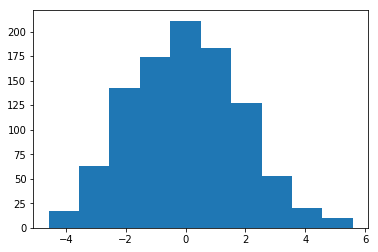

In [279]:
plt.hist(permutation_zero_distribution_ind(no_incidents, incidents, 1000))

In [276]:
np.random.seed(0)
zero_dist = permutation_zero_distribution_ind(no_incidents_mean, incidents_mean, 1000)

In [288]:
def permutation_test(sample1, sample2, max_combination=1000):
    z = permutation_t_stat_ind(sample1, sample2)
    print('z', z)
    zero_dist = permutation_zero_distribution_ind(sample1, sample2, max_combination)
    plt.hist(zero_dist)
    plt.show()
    
    return sum([abs(x) >= abs(z) for x in zero_dist]) / len(zero_dist)

z 4.666964285714283


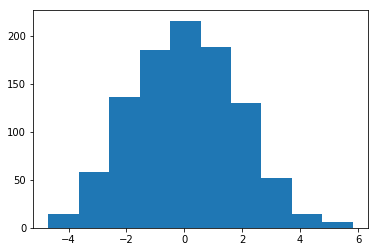

0.009

In [289]:
np.random.seed(0)
permutation_test(no_incidents, incidents)

z -4.666964285714283


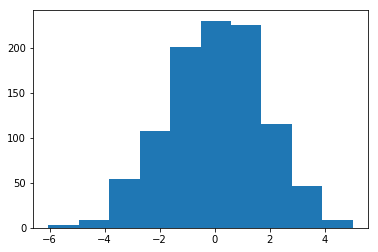

0.006

In [290]:
np.random.seed(0)
permutation_test(incidents, no_incidents)